In [1]:
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
((XT,YT),(Xt,Yt))=imdb.load_data(num_words=10000)
# specify the the unique words you want in your vocab

17465344/17464789 [==============================] - 56s 3us/step


In [3]:
len(XT)

25000

In [4]:
print(XT[0])  ### the sentence is randomly placed


[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [5]:
word_idx=imdb.get_word_index()  ### getting each word index in vocabulary

1646592/1641221 [==============================] - 5s 3us/step


In [7]:
#print(word_idx.items())   

### it gives you the index of each word that occur in the vocabulary

In [8]:
idx_word=dict([value,key]  for (key,value) in word_idx.items())   ## reversing 

In [9]:
act_review=' '.join([idx_word.get(idx-3,'#') for idx in XT[0]])
# -3 because when keras create vocab it automatically add 3 words which are "pad_word","<s>"and "<unk> unknown word"
print(act_review)

# this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert # is an amazing actor and now the same being director # father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for # and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also # to the two little boy's that played the # of norman and paul they were just brilliant children are often left out of the # list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [10]:
### next step is to vectorize the data  (for the neural network)
### since our vocab is of size 10000 so each sentence in our vocab should be of length 10000
### we have to do this as your neural network accepts fixed length inputs not the variable length
### as differnt sentences will have different length

In [11]:
print(XT[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [12]:
import numpy as np
def vectorize(sentences,dim=10000):

  output=np.zeros((len(sentences),dim))
  for i,idx in enumerate(sentences):
    output[i,idx]=1
  
  return output


In [13]:
X_train=vectorize(XT)
X_test=vectorize(Xt)

In [14]:
print(X_train.shape,X_test.shape)
### here 10000 is size of the vocab aand now are features for the neural vector

(25000, 10000) (25000, 10000)


In [15]:
X_train[0]  ### now you can see our sentences are vectorized and contains only 1 and 0 
### for a word present in the sentence we marked as 1 in vectorize function

array([0., 1., 1., ..., 0., 0., 0.])

In [16]:
Y_train=np.asarray(YT.astype('float32'))
Y_test=np.asarray(Yt.astype('float32'))

In [17]:
print(YT[100])

0


In [18]:
print(Y_train[0])

1.0


In [19]:
##### building our neural network

In [20]:
from keras import models
from keras.layers import Dense


In [21]:
### defining our neural network
model=models.Sequential()
model.add(Dense(16,activation='relu',input_shape=(10000,)))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))



Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [22]:
### compile our model
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])  ## metrics is for on which basus you are comparing
## goal of the optimizer is to adjust the weights in a model to minimize the loss


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [23]:
model.summary()

### in first layer 10000(input) * 16 + 16=parametres
### in second layer 16*16 + 16(bias terms) parametres
### in third layer 16*1 + 1 parametres


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [24]:

#### training validation
#### creating validation set to check for overfitting

x_val=X_train[:5000]
X_train_new=X_train[5000:]

y_val=Y_train[:5000]
y_train_new=Y_train[5000:]


In [25]:
hist=model.fit(X_train_new,y_train_new,epochs=3,batch_size=512,validation_data=(x_val,y_val))


Train on 20000 samples, validate on 5000 samples
Epoch 1/3
20000/20000 [==============================] - 4s 200us/step - loss: 0.4895 - accuracy: 0.8059 - val_loss: 0.3772 - val_accuracy: 0.8530
Epoch 2/3
20000/20000 [==============================] - 2s 105us/step - loss: 0.2822 - accuracy: 0.9080 - val_loss: 0.2985 - val_accuracy: 0.8814
Epoch 3/3
20000/20000 [==============================] - 2s 106us/step - loss: 0.2117 - accuracy: 0.9263 - val_loss: 0.2899 - val_accuracy: 0.8866


In [26]:
import matplotlib.pyplot as plt


In [27]:
h=hist.history

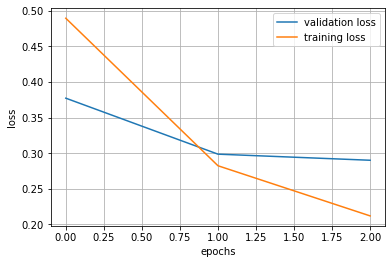

In [28]:
plt.plot(h['val_loss'],label='validation loss')
plt.plot(h['loss'],label='training loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()
plt.legend()
plt.show()
### here you can see validation loss is decreased upto 3 and then start increasing

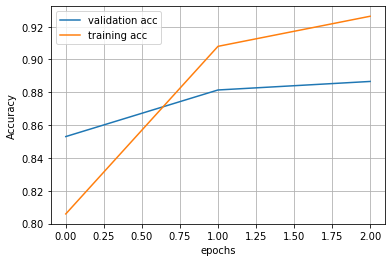

In [29]:
plt.plot(h['val_accuracy'],label='validation acc')
plt.plot(h['accuracy'],label='training acc')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.show()

In [30]:
model.evaluate(X_test,Y_test)[1]

25000/25000 [==============================] - 11s 457us/step


0.873520016670227

In [31]:
model.predict(X_test)

array([[0.2590198 ],
       [0.99900794],
       [0.45398915],
       ...,
       [0.13241246],
       [0.09929943],
       [0.33364332]], dtype=float32)

In [32]:
####################################################################### RNN ##################################################################

In [33]:
from keras.preprocessing import sequence


In [ ]:
X_train=sequence.pad_sequences(XT,maxlen=500)
X_test=sequence.pad_sequences(Xt,maxlen=500)  
### here we are clippinhg the sentences which have length more than 500

In [ ]:
print(X_train.shape,X_test.shape)
## now every sentence have length 500 to pass in embedding layer

In [ ]:
############################################################################# creating a model in keras ##################################################

In [ ]:
from keras.layers import Embedding,SimpleRNN,Dense ## here we import whole of RNN layer not just the cell
from keras.models import Sequential

model=Sequential()
model.add(Embedding(10000,64))  ## now each word is represented by 640000 dim vector
model.add(SimpleRNN(32))  ### here 32 is the activation vector for the next cell of RNN layer
model.add(Dense(1,activation='sigmoid'))
model.summary()
#### Now we will feed this output of Embedding layer into RNN layer

In [ ]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

In [ ]:
SimpleRNN?

In [0]:
from keras.callbacks import ModelCheckpoint,EarlyStopping


## MOdel checkpoint will save the best model and will against overfitting
## Earlystopping will save time 
checkpoint=ModelCheckpoint("best_model.h5", monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)

early_stop=EarlyStopping(monitor='val_acc', min_delta=0, patience=1, verbose=0, mode='auto', baseline=None, restore_best_weights=False)

### patience is for how much epoch you will wait to see increase in accuracy

hist=model.fit(X_train,YT,validation_split=0.2,epochs=10,batch_size=128,callbacks=[checkpoint,early_stop]) ## here training will automatically reduce if accuracy doesnot 
## improve after 2 epochs

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.1659 - acc: 0.9396 - val_loss: 0.5354 - val_acc: 0.7644
Epoch 2/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.1032 - acc: 0.9637 - val_loss: 0.4144 - val_acc: 0.8546
Epoch 3/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.0643 - acc: 0.9786 - val_loss: 0.4881 - val_acc: 0.8496


In [0]:
######################################################################## Early Stopping ##############################################################
### (also reduces overfitting)
## Early stopping is done when you want to break your training ,this is done when suppose you have given 10 epochs but after the 5 epochs
## accuracy is not improving so from there we just break the training

In [0]:
model.save("my_model.h5")

In [0]:
ls

best_model.h5  my_model.h5  sample_data/


In [0]:
model.load_weights("best_model.h5")

In [0]:
model.evaluate(X_train,YT)  ### we have acheived 95% acc in training dataset

25000/25000 [==============================] - 18s 702us/step


[0.11745871155619621, 0.9622]

In [0]:
model.evaluate(X_test,Yt)

25000/25000 [==============================] - 18s 730us/step


[0.42735049978256223, 0.84688]

In [0]:
################################################ Callbacks in keras ############333333

In [0]:
# meaning of callbacks is after each epoch you call some function to save the model at each epoch